In [71]:
from dataset import *
from model import *
import torch
import numpy as np

In [72]:
# Hyperparameters.
seed = 0
batch_size = 1  # wondering trained on some fixed slot makes difference
num_slots = 10
num_iterations = 3
resolution = (128, 128)

In [73]:
resolution = (128, 128)
model = SlotAttentionAutoEncoder(resolution, num_slots, num_iterations, 64)
model_path = "/shared/rzhang/slot_att/tmp/reduced-decoder/model10.ckpt"
model.load_state_dict(torch.load(model_path)["model_state_dict"])

<All keys matched successfully>

In [74]:
test_set = CLEVR("test")

In [75]:
model = model.to(device)
image = test_set[4]["image"]
print(image.shape)
image = image.unsqueeze(0).to(device)
# recon_combined, recons, masks, slots = model(image)
# print(recon_combined.shape)

torch.Size([3, 128, 128])


In [76]:
# # Calculate the number of slots through spectral decomposition
# #  highest eigenvalue is a hyperparam, we assume all objects are smaller than it.
# largest_eigenvalue = 5000
# z = model.encode(image)
# z = z.squeeze(0)
# U, eigenvalues, eigenvectors = torch.pca_lowrank(z, q=64)  # Eva x D, Eve x D
# eigenvalues = torch.floor(eigenvalues)
# num_slots = torch.sum(torch.ceil(eigenvalues / largest_eigenvalue))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


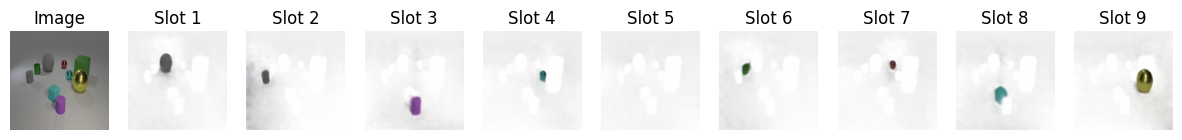

In [77]:
# import matplotlib.pyplot as plt
# from sklearn.cluster import AgglomerativeClustering

# n_clusters = 9
# # Process after slot attention and before decoder
# z = model.encode(image)
# slots = model.slot_att(z)
# # slots = slots.squeeze(0)
# # cluster_means = model.slot_merge(slots, n_clusters)
# recon_combined, recons, masks, slots = model.decode(slots, 1)
# recon_combined = recon_combined.squeeze(0)
# image = image.squeeze(0)
# recons = recons.squeeze(0)
# masks = masks.squeeze(0)
# image = image.permute(1, 2, 0).cpu().numpy()
# recon_combined = recon_combined.permute(1, 2, 0)
# recon_combined = recon_combined.cpu().detach().numpy()
# recons = recons.cpu().detach().numpy()
# masks = masks.cpu().detach().numpy()
# fig, ax = plt.subplots(1, n_clusters + 1, figsize=(15, 2))
# ax[0].imshow(image)
# ax[0].set_title("Image")
# # ax[1].imshow(recon_combined)
# # ax[1].set_title("Recon.")
# for i in range(n_clusters):
#     picture = recons[i] * masks[i] + (1 - masks[i])
#     ax[i + 1].imshow(picture)
#     ax[i + 1].set_title("Slot %s" % str(i + 1))
# for i in range(len(ax)):
#     ax[i].grid(False)
#     ax[i].axis("off")

In [78]:
model = model.to(device)
image = test_set[4]["image"]
image = image.unsqueeze(0).to(device)
recon_combined, recons, masks, slots = model(image)
print(recon_combined.shape)

torch.Size([3, 128, 128])
torch.Size([1, 3, 128, 128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(10, 128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


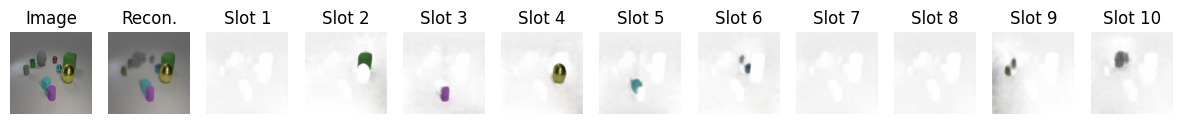

In [79]:
import matplotlib.pyplot as plt
from PIL import Image as Image, ImageEnhance

fig, ax = plt.subplots(1, num_slots + 2, figsize=(15, 2))
image = image.squeeze(0)
recon_combined = recon_combined.squeeze(0)
recons = recons.squeeze(0)
masks = masks.squeeze(0)
image = image.permute(1, 2, 0).cpu().numpy()
recon_combined = recon_combined.permute(1, 2, 0)
recon_combined = recon_combined.cpu().detach().numpy()
recons = recons.cpu().detach().numpy()
masks = masks.cpu().detach().numpy()
ax[0].imshow(image)
ax[0].set_title("Image")
ax[1].imshow(recon_combined)
ax[1].set_title("Recon.")
print(recons.shape)
for i in range(num_slots):
    picture = recons[i] * masks[i] + (1 - masks[i])
    print(picture.shape)
    ax[i + 2].imshow(picture)
    ax[i + 2].set_title("Slot %s" % str(i + 1))
for i in range(len(ax)):
    ax[i].grid(False)
    ax[i].axis("off")

In [80]:
print(recons.shape)

(10, 128, 128, 3)


In [81]:
# recursively extract background
num_slots = 2
model = SlotAttentionAutoEncoder(resolution, num_slots, num_iterations, 64)
model.load_state_dict(torch.load(model_path)["model_state_dict"])
print(recons.shape)

(10, 128, 128, 3)


(10, 128, 128, 3)
(10, 128, 128, 3)
(128, 128, 3)
torch.Size([1, 3, 128, 128])


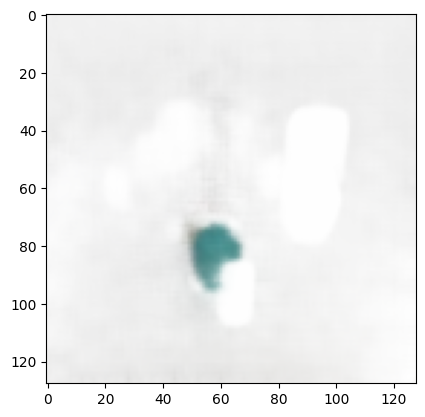

In [82]:
model = model.to(device)
# Insert the background blended image
# recons = recons.squeeze(0)
print(recons.shape)
i = 4
image1 = recons[i] * masks[i] + (1 - masks[i])
orig_image = image1
print(recons.shape)
plt.imshow(image1)
print(image1.shape)
image1 = torch.tensor(image1).unsqueeze(0).to(device)
image1 = torch.reshape(image1, (1, 3, 128, 128))
recon_combined, recons1, masks1, slots = model(image1)
print(recon_combined.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


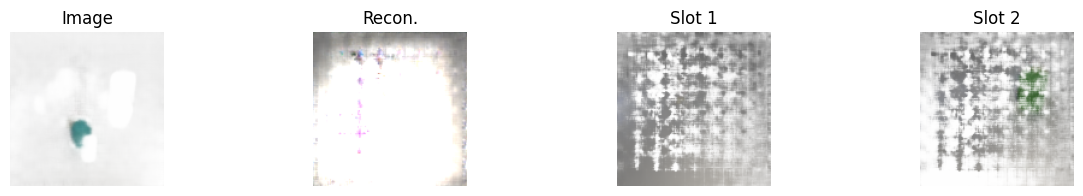

In [83]:
import matplotlib.pyplot as plt
from PIL import Image as Image, ImageEnhance

fig, ax = plt.subplots(1, num_slots + 2, figsize=(15, 2))
recon_combined = recon_combined.squeeze(0)
recons1 = recons1.squeeze(0)
masks1 = masks1.squeeze(0)
recon_combined = recon_combined.permute(1, 2, 0)
recon_combined = recon_combined.cpu().detach().numpy()
recons1 = recons1.cpu().detach().numpy()
masks1 = masks1.cpu().detach().numpy()
ax[0].imshow(orig_image)
ax[0].set_title("Image")
ax[1].imshow(recon_combined)
ax[1].set_title("Recon.")
for i in range(num_slots):
    picture = recons[i] * masks1[i] + (1 - masks1[i])
    ax[i + 2].imshow(picture)
    ax[i + 2].set_title("Slot %s" % str(i + 1))
for i in range(len(ax)):
    ax[i].grid(False)
    ax[i].axis("off")